# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")



# Opening the required csv file

In [2]:
df = pd.read_csv(r"C:\Users\lavanya\Downloads\nasa\nasa.csv")
df.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


# Performing EDA

In [3]:
df.shape

(4687, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
df_n = df.select_dtypes(include = ['number'])
df_n

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767


In [8]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Epoch Date Close Approach     4687 non-null   int64  
 12  Relative Velocity km per sec  4687 non-null   float64
 13  Rel

In [9]:
df_n.drop(["Neo Reference ID","Name","Est Dia in M(min)","Est Dia in M(max)","Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)","Relative Velocity km per hr","Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Orbit ID"],axis=1,inplace=True)


In [10]:
df_n

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,21.600,0.127220,0.284472,788947200000,6.115834,13680.509944,6.275369e+07,5,0.025282,4.634,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,21.300,0.146068,0.326618,788947200000,18.113985,40519.173105,5.729815e+07,3,0.186935,5.457,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,20.300,0.231502,0.517654,789552000000,7.590711,16979.661798,7.622912e+06,0,0.043058,4.557,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,27.400,0.008801,0.019681,790156800000,11.173874,24994.839864,4.268362e+07,6,0.005512,5.093,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,21.600,0.127220,0.284472,790156800000,9.840831,22012.954985,6.101082e+07,1,0.034798,5.154,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,1473318000000,22.154265,49556.875548,6.187511e+06,8,0.019777,5.156,...,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436
4683,28.200,0.006089,0.013616,1473318000000,3.225150,7214.337772,9.677324e+05,6,0.006451,5.742,...,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117
4684,22.700,0.076658,0.171412,1473318000000,7.191642,16086.983633,9.126775e+06,6,0.059972,4.410,...,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698
4685,21.800,0.116026,0.259442,1473318000000,11.352090,25393.489071,3.900908e+07,5,0.177510,4.477,...,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767


# Plotting boxplots to check for outliers

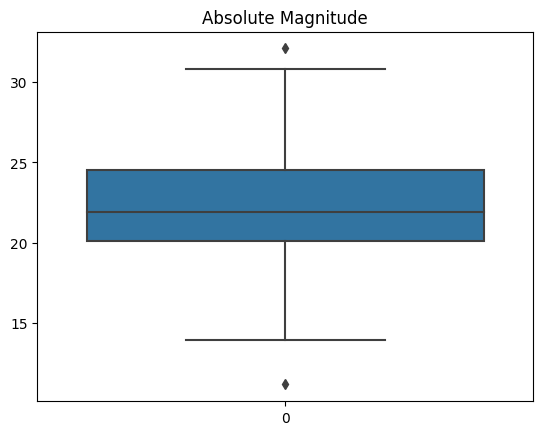

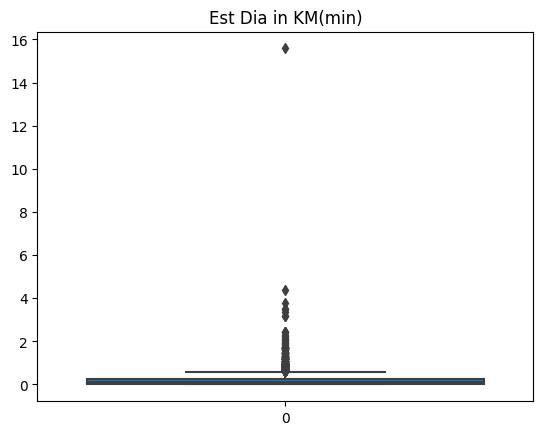

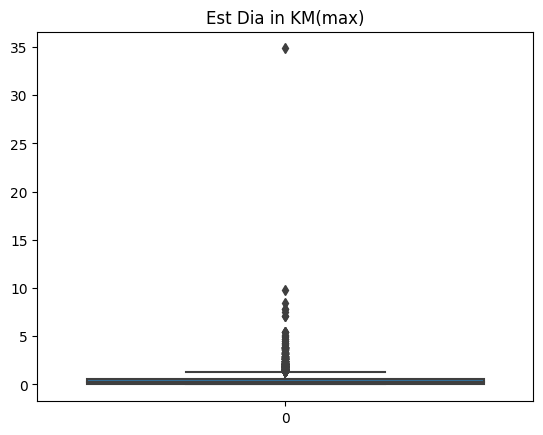

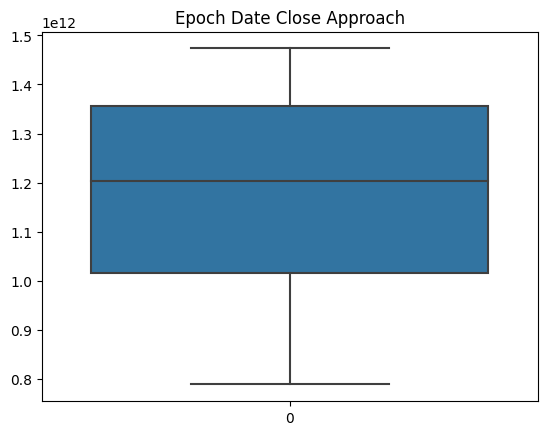

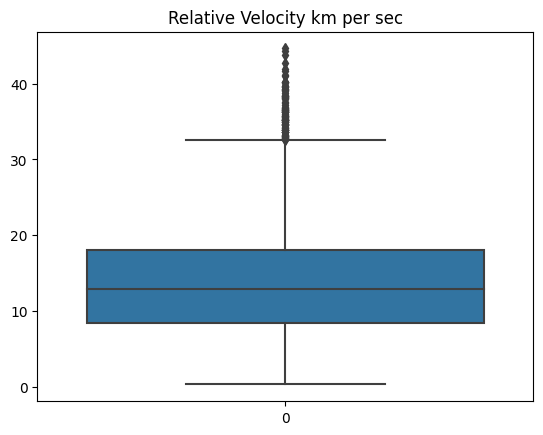

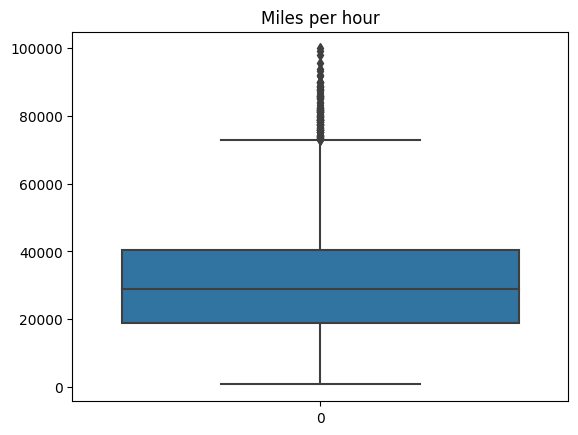

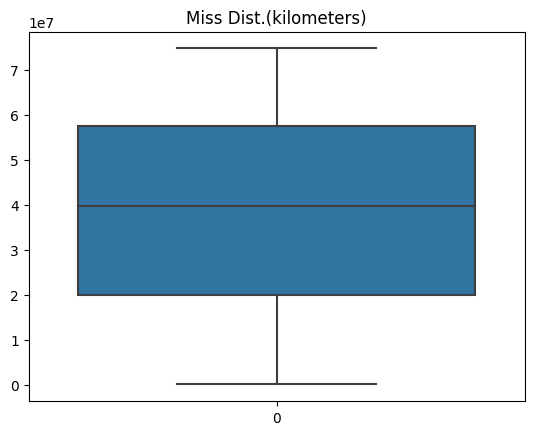

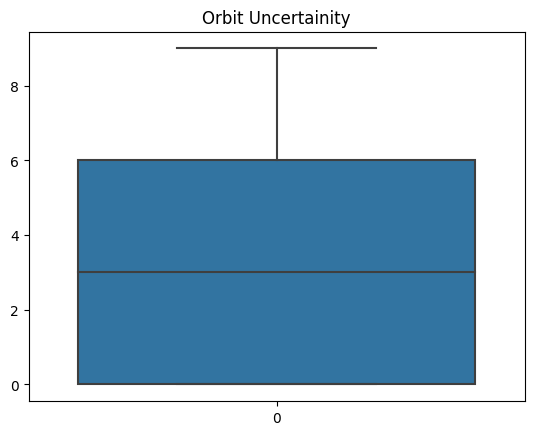

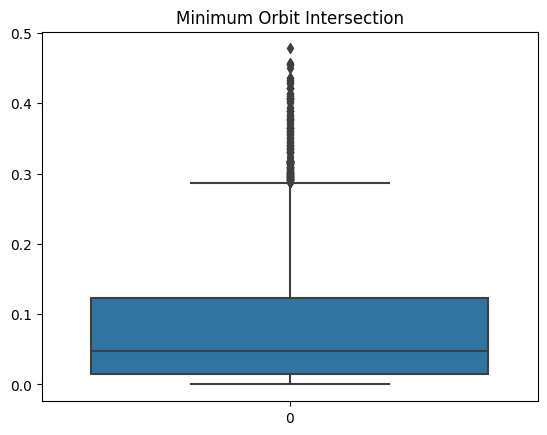

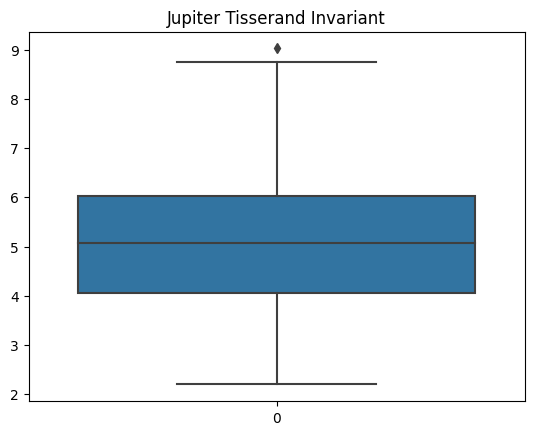

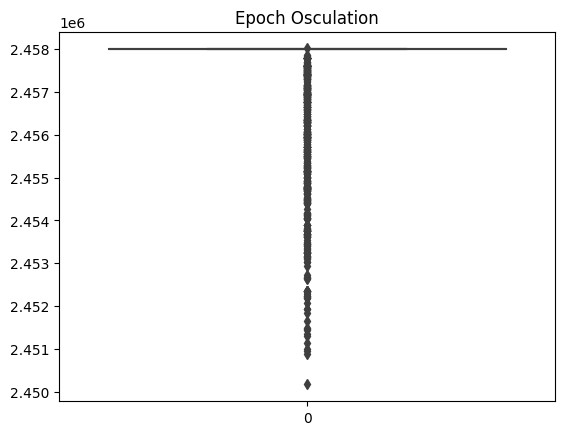

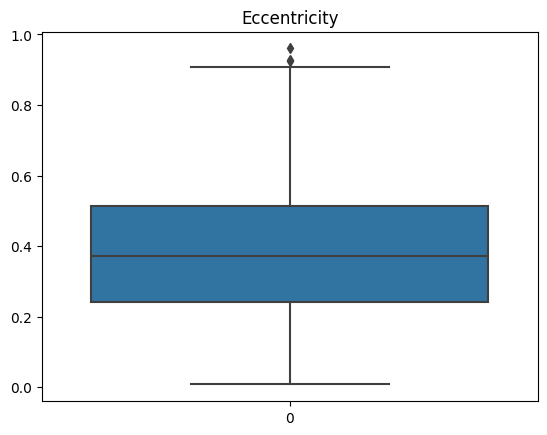

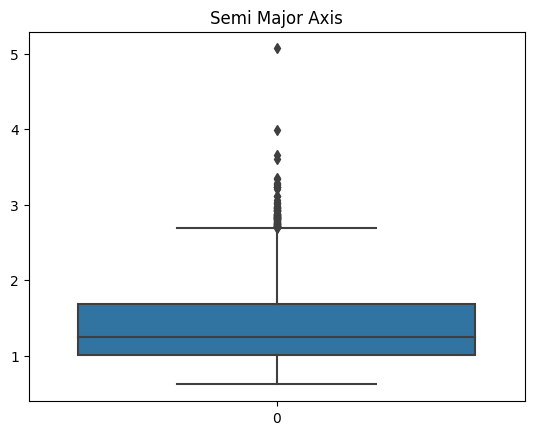

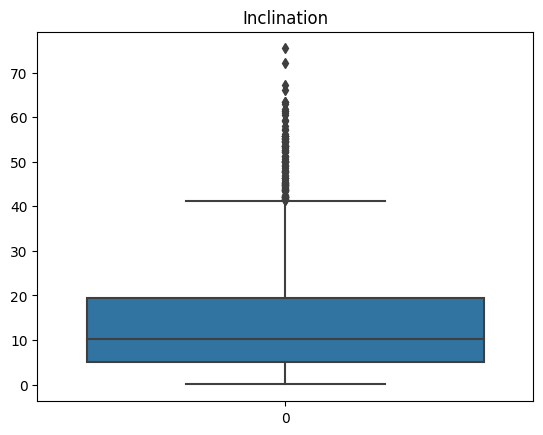

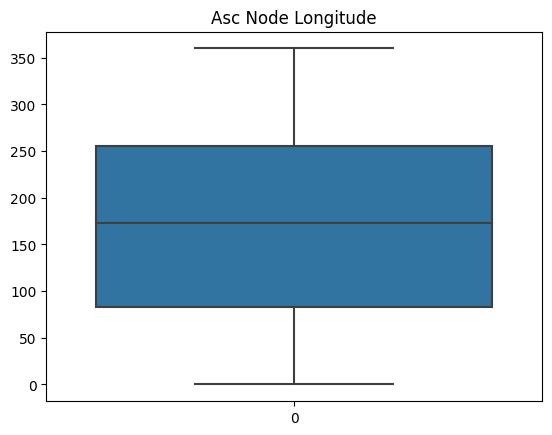

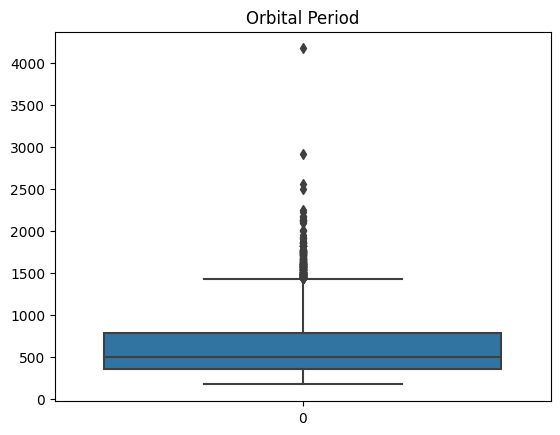

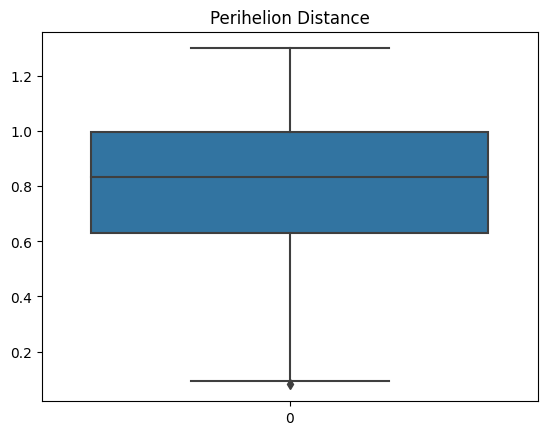

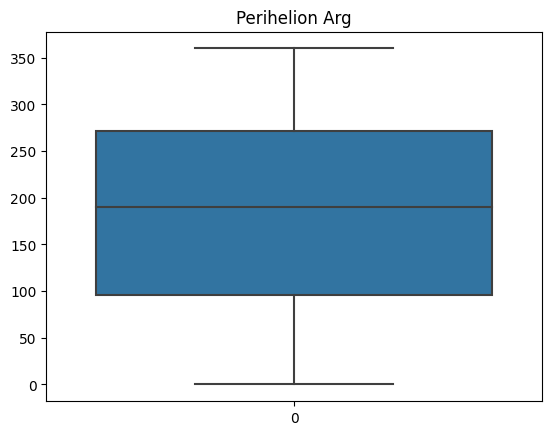

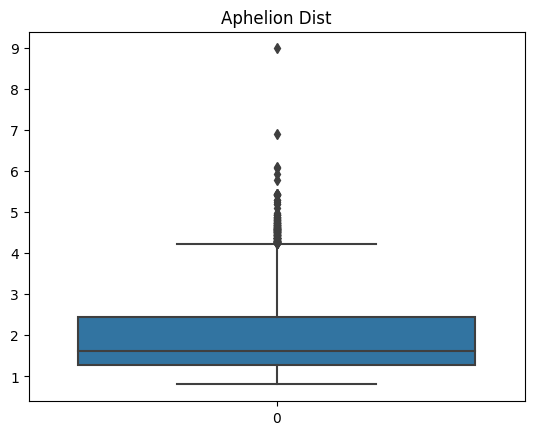

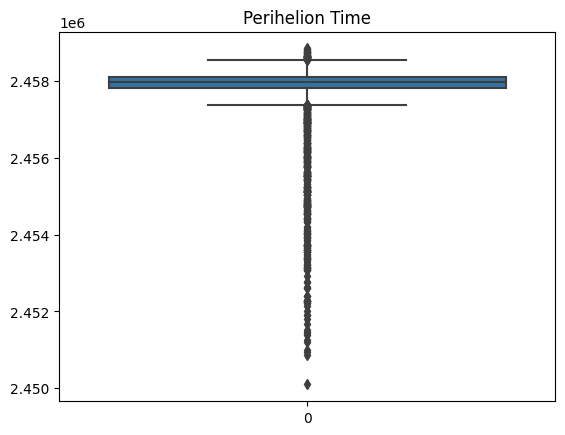

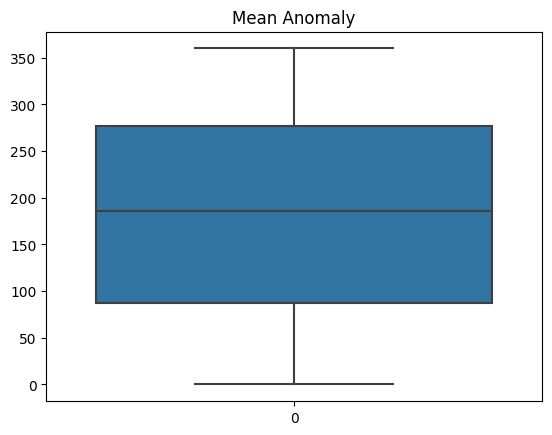

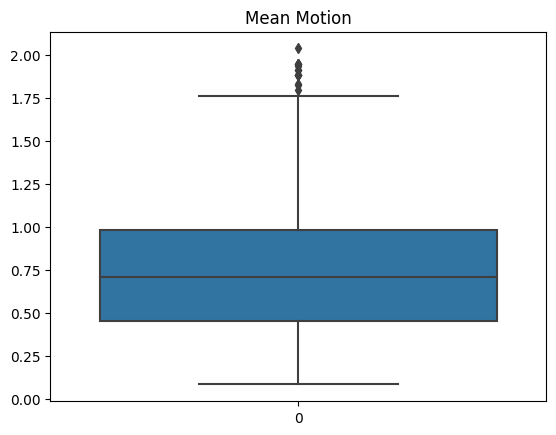

In [11]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

In [12]:
# df_n[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
#        'Relative Velocity km per sec', 'Miles per hour',
#        'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
#        'Eccentricity', 'Semi Major Axis', 'Inclination', 'Orbital Period',
#        'Aphelion Dist', 'Mean Motion','Epoch Osculation', 'Perihelion Distance',
#        'Perihelion Time']].describe()

In [13]:
df_n['Epoch Osculation'].describe()

count    4.687000e+03
mean     2.457724e+06
std      9.202975e+02
min      2.450164e+06
25%      2.458000e+06
50%      2.458000e+06
75%      2.458000e+06
max      2.458020e+06
Name: Epoch Osculation, dtype: float64

<AxesSubplot: >

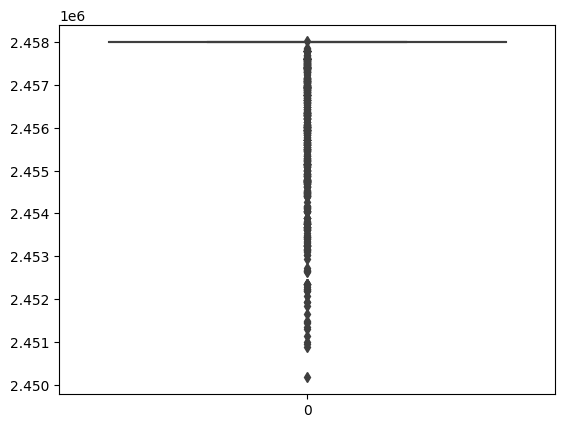

In [14]:
sns.boxplot(df_n['Epoch Osculation'])

In [15]:
# for i in df_n.columns:
#     plt.title(i)
#     sns.boxplot(df_n[i])
#     plt.show()

# Using IQR to remove outliers

In [16]:
def wisker(col):
  q1=df_n[col].quantile(0.25)
  q3=df_n[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [17]:
for i in df_n.columns:
  lower,upper=wisker(i)
  df_n[i]=np.where(df_n[i]<=lower,lower,df_n[i])
  df_n[i]=np.where(df_n[i]>=upper,upper,df_n[i])

In [18]:
df['Epoch Osculation'].value_counts()

2458000.5    4048
2457600.5      64
2457800.5      55
2455707.5       5
2457431.5       4
             ... 
2454806.5       1
2454791.5       1
2454765.5       1
2454768.5       1
2457637.5       1
Name: Epoch Osculation, Length: 429, dtype: int64

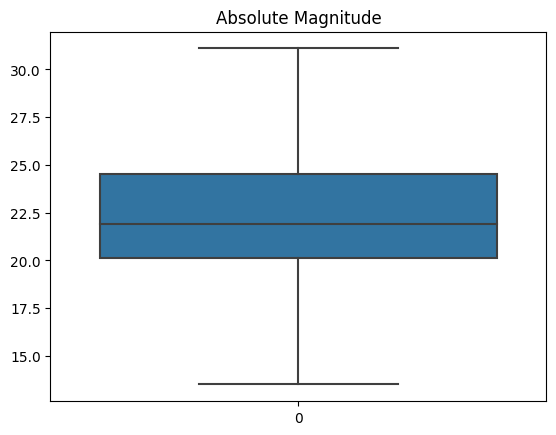

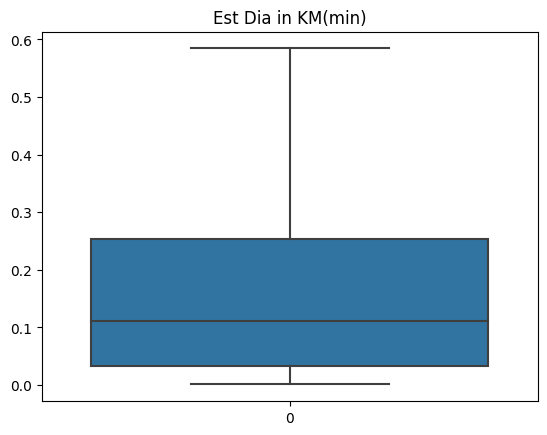

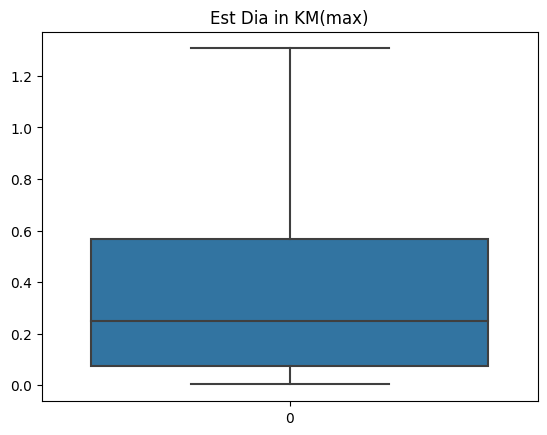

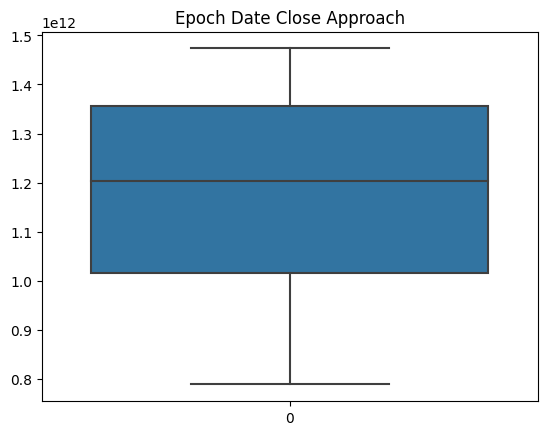

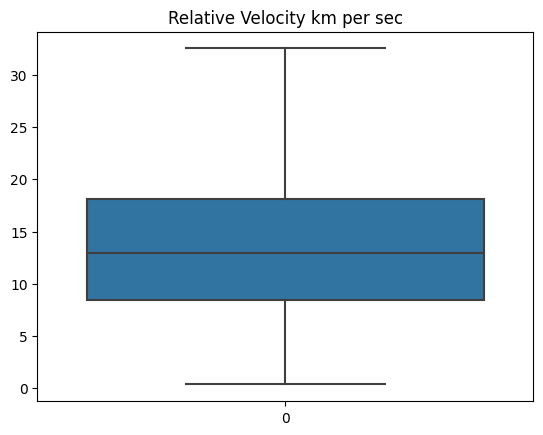

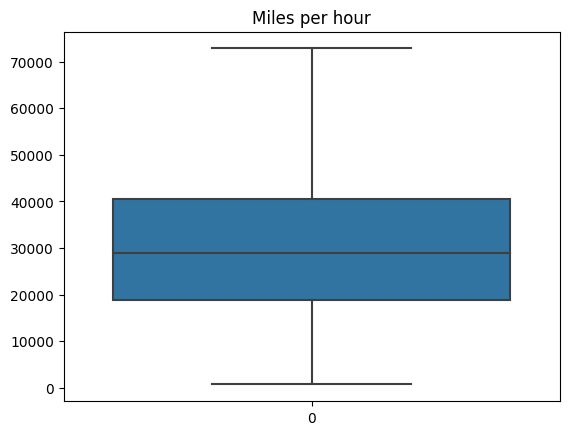

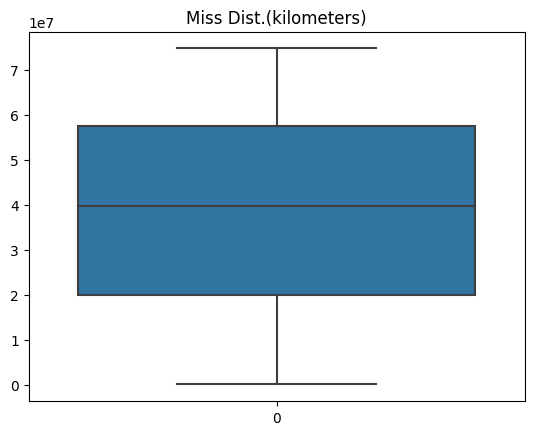

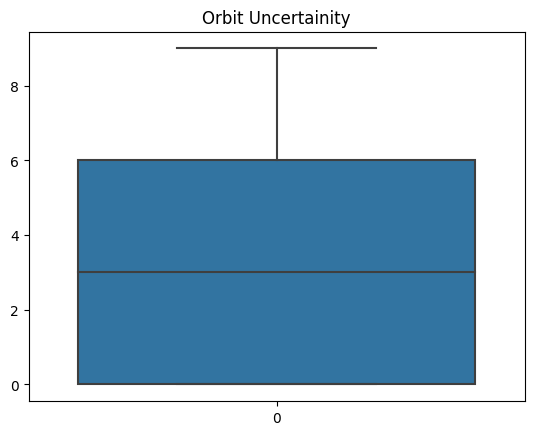

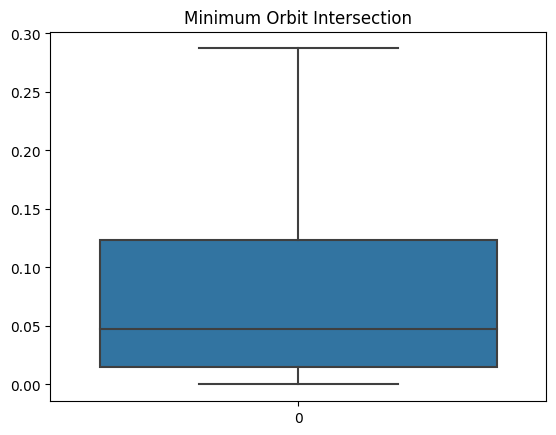

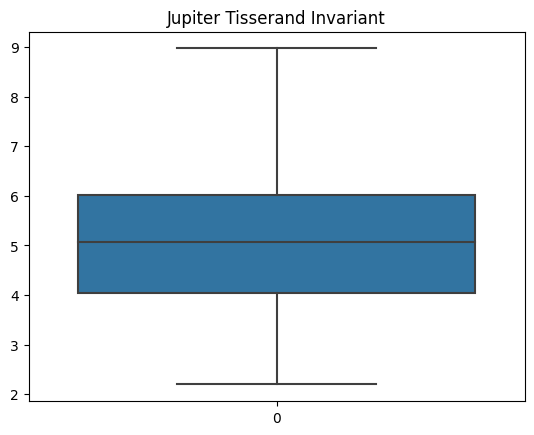

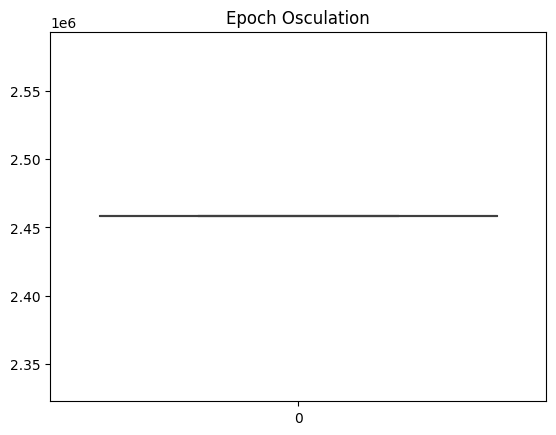

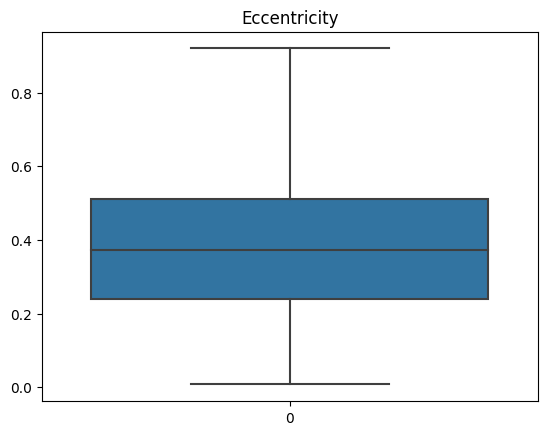

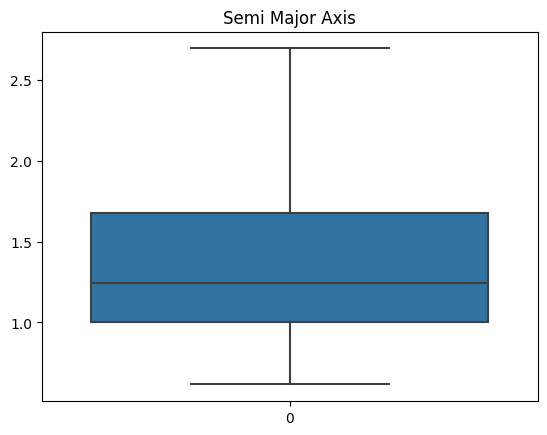

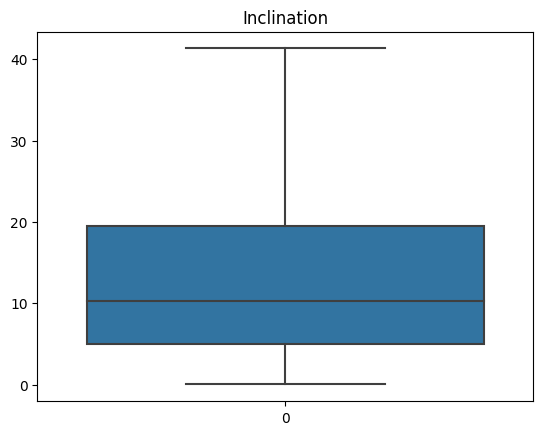

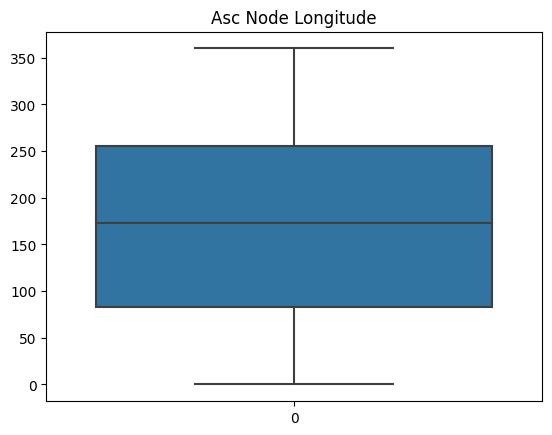

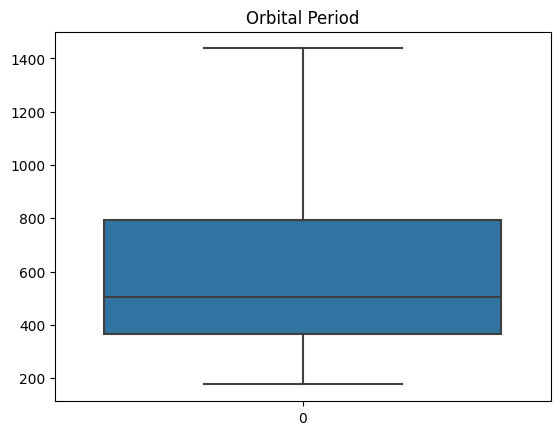

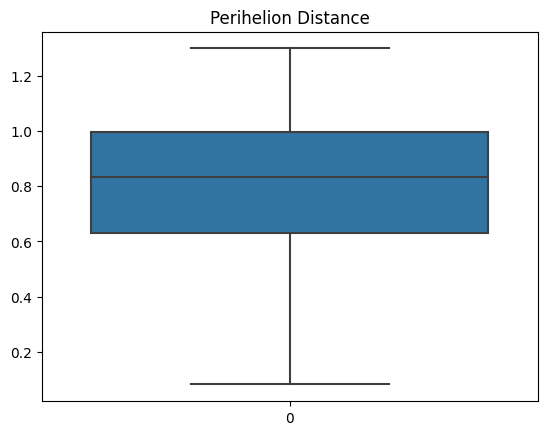

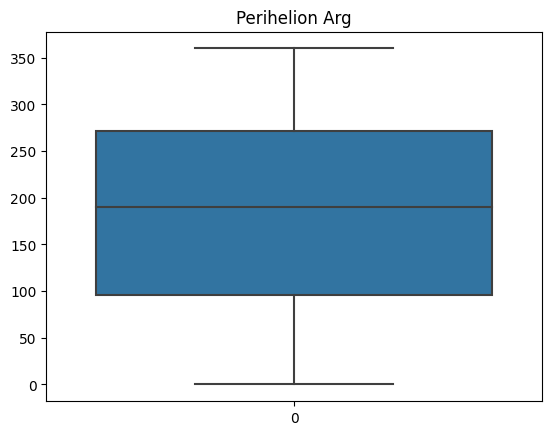

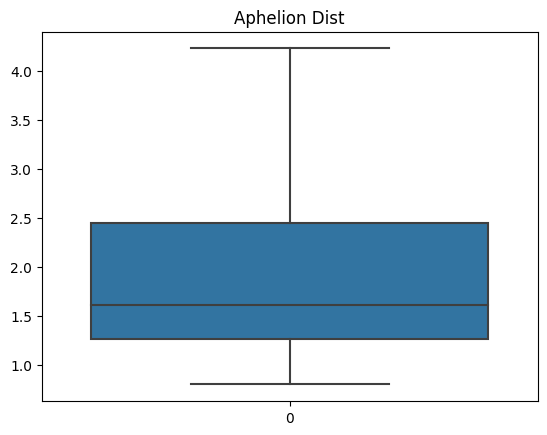

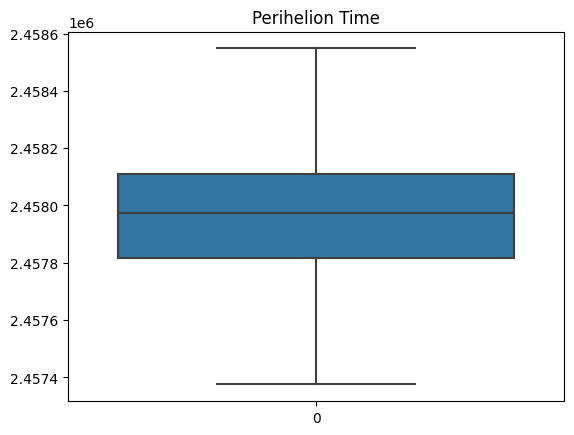

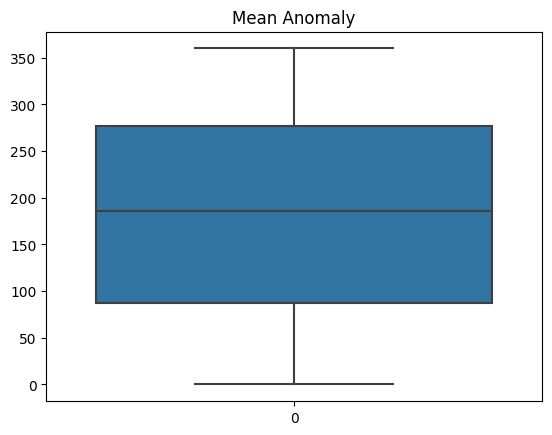

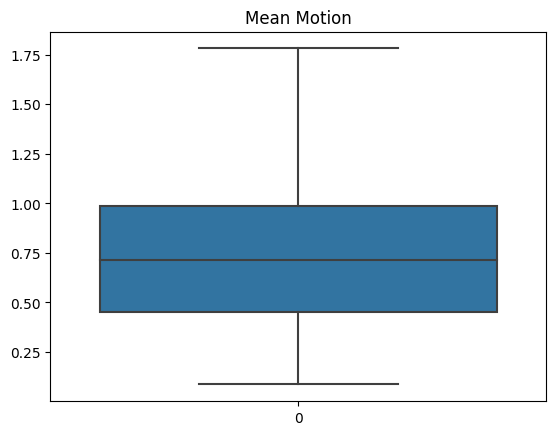

In [19]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

<AxesSubplot: >

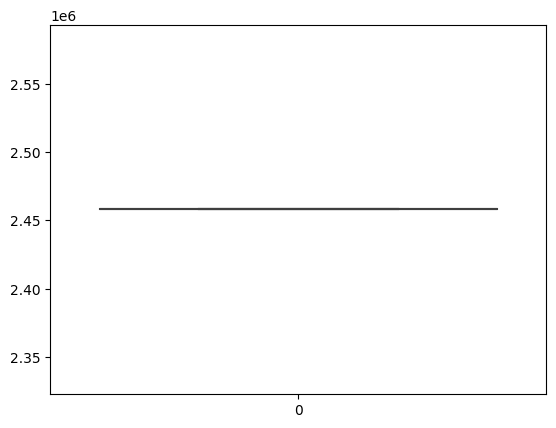

In [20]:
sns.boxplot(df_n['Epoch Osculation'])

In [21]:
#df.iloc[np.where(df["Est Dia in KM(min)"]>0.253837)][df["Hazardous"]]

In [22]:
df_c = df.select_dtypes(include = ['object'])
df_c

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox
0,1995-01-01,Earth,2017-04-06 08:36:37,J2000
1,1995-01-01,Earth,2017-04-06 08:32:49,J2000
2,1995-01-08,Earth,2017-04-06 09:20:19,J2000
3,1995-01-15,Earth,2017-04-06 09:15:49,J2000
4,1995-01-15,Earth,2017-04-06 08:57:58,J2000
...,...,...,...,...
4682,2016-09-08,Earth,2017-04-06 08:24:07,J2000
4683,2016-09-08,Earth,2017-04-06 08:23:58,J2000
4684,2016-09-08,Earth,2017-04-06 08:23:43,J2000
4685,2016-09-08,Earth,2017-04-06 08:23:42,J2000


# Encoding Target variable

In [23]:
df["Hazardous"]

LE = LabelEncoder()

df["Hazardous"] = LE.fit_transform(df["Hazardous"])

In [24]:
df["Hazardous"]

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int64

In [25]:
df_n.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miles per hour', 'Miss Dist.(kilometers)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion'],
      dtype='object')

# Standardizing the Input features to bring them to same scale

In [26]:
SS = StandardScaler()
#MM = MinMaxScaler()

#df_n_f = SS.fit_transform(df_n_f)

# df_n[df_n.columns] = SS.fit_transform(df_n)
df_n[df_n.columns] = SS.fit_transform(df_n)



In [27]:
# group1_data = df_n_f[df["Hazardous"] == 0]
# group2_data = df_n_f[df["Hazardous"] == 1]

In [28]:
# group1_data

In [29]:
df_n["Epoch Osculation"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4682    0.0
4683    0.0
4684    0.0
4685    0.0
4686    0.0
Name: Epoch Osculation, Length: 4687, dtype: float64

In [30]:
df_n.max()

Absolute Magnitude              3.057847
Est Dia in KM(min)              2.380996
Est Dia in KM(max)              2.380996
Epoch Date Close Approach       1.481014
Relative Velocity km per sec    2.650207
Miles per hour                  2.650207
Miss Dist.(kilometers)          1.667592
Orbit Uncertainity              1.781377
Minimum Orbit Intersection      2.489510
Jupiter Tisserand Invariant     3.164987
Epoch Osculation                0.000000
Eccentricity                    2.977900
Semi Major Axis                 2.550505
Inclination                     2.752106
Asc Node Longitude              1.818111
Orbital Period                  2.383174
Perihelion Distance             2.009843
Perihelion Arg                  1.701039
Aphelion Dist                   2.479611
Perihelion Time                 2.242025
Mean Anomaly                    1.662944
Mean Motion                     3.057562
dtype: float64

In [31]:
df_n.columns[np.where(df_n.max()>3.0)]

Index(['Absolute Magnitude', 'Jupiter Tisserand Invariant', 'Mean Motion'], dtype='object')

In [32]:
df_n.iloc[np.where(df_n["Epoch Osculation"].min() <-3.0)]

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion


In [33]:
df_n.columns[np.where(df_n.min()<-3.0)]

Index(['Absolute Magnitude', 'Perihelion Distance'], dtype='object')

In [34]:
# ['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
#        'Relative Velocity km per sec', 'Miles per hour',
#        'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
#        'Eccentricity', 'Semi Major Axis', 'Inclination', 'Orbital Period',
#        'Aphelion Dist', 'Mean Motion','Epoch Osculation', 'Perihelion Distance',
#        'Perihelion Time']


In [35]:
group1_data = df_n[df["Hazardous"] == 0]
group2_data = df_n[df["Hazardous"] == 1]

In [36]:
group1_data

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
1,-0.335202,-0.151182,-0.151182,-1.973087,0.600413,0.600413,0.865921,-0.167955,1.285921,0.323920,...,-0.565038,1.489624,-0.343192,-0.586658,-0.393268,1.247897,-0.523224,-0.489415,-0.069093,0.314732
3,1.776798,-0.944152,-0.944152,-1.966982,-0.385378,-0.385378,0.195800,0.806711,-0.893939,0.029814,...,-0.274273,-0.513817,-1.113477,-0.327586,0.704525,-1.596341,-0.489637,-0.099910,-1.045928,-0.110140
5,-0.923793,0.851068,0.851068,-1.966982,-0.437228,-0.437228,0.932941,-0.817732,2.310564,-0.268331,...,-0.141521,0.465268,0.065992,-0.204006,-0.973354,0.137329,0.105502,0.288497,1.610096,-0.265329
6,-0.923793,0.851068,0.851068,-1.966982,-0.437229,-0.437229,0.932930,-0.817732,2.310564,-0.268331,...,-0.141521,0.465268,0.065992,-0.204006,-0.973354,0.137329,0.105502,0.288497,1.610096,-0.265329
7,-1.062284,1.224461,1.224461,-1.963930,1.496403,1.496403,-0.875269,-1.142621,0.226448,-0.109158,...,-0.310447,2.103356,-0.577096,-0.360695,-0.547359,1.009087,-0.197059,1.133898,0.052182,-0.064151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.564994,-0.740169,-0.740169,1.481014,1.174305,1.174305,-1.477660,1.456488,-0.722541,0.080717,...,-0.459721,2.609940,-0.077218,-0.494702,-0.296759,0.893350,-0.430938,-0.804092,1.145576,0.145156
4683,2.053781,-0.959821,-0.959821,1.481014,-1.514436,-1.514436,-1.717003,0.806711,-0.882657,0.554195,...,-0.629111,-0.762514,1.675947,-0.641530,0.756306,-1.370226,-0.900867,0.572239,0.947165,0.428345
4684,0.149519,-0.552157,-0.552157,1.481014,-0.951025,-0.951025,-1.342886,0.806711,-0.239575,-0.522037,...,0.260297,-0.855791,-1.308573,0.189227,0.629571,0.876897,0.129075,1.344456,0.207770,-0.633214
4685,-0.162088,-0.324731,-0.324731,1.481014,-0.360064,-0.360064,0.027311,0.481822,1.172676,-0.467903,...,0.178572,0.773251,-0.080902,0.106976,1.537328,-0.034647,-0.203997,1.300130,0.207991,-0.568572


In [37]:
group2_data

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,-0.231334,-0.260065,-0.260065,-1.973087,-1.103836,-1.103836,1.116075,0.481822,-0.656394,-0.341049,...,0.022344,-0.697475,1.377191,-0.047060,-0.021173,-1.223886,0.035693,0.840785,0.778393,-0.431537
2,-0.681432,0.342359,0.342359,-1.970035,-0.894340,-0.894340,-1.411843,-1.142621,-0.442810,-0.403264,...,0.124049,-0.872156,0.845573,0.052737,0.567723,0.623011,-0.007079,0.691414,1.039404,-0.522867
4,-0.231334,-0.260065,-0.260065,-1.966982,-0.574727,-0.574727,1.036159,-0.817732,-0.542055,0.079101,...,-0.333727,0.354446,-0.847599,-0.381873,0.637530,-0.248001,-0.538405,-0.418726,-0.428186,-0.033637
9,-0.265957,-0.225429,-0.225429,-1.963930,-0.140250,-0.140250,-0.720061,-1.142621,-0.757028,1.266027,...,-1.019754,-1.084973,-1.641818,-0.957689,-1.736722,0.674710,-0.675088,-0.105595,-0.570346,1.359048
22,-0.196711,-0.293143,-0.293143,-1.950412,2.064158,2.064158,-1.428406,-0.817732,-0.805474,0.885467,...,-0.959671,-0.891977,1.652309,-0.911189,-2.867686,1.337736,-0.306867,-2.011220,1.142536,1.182307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4662,-1.027661,1.124569,1.124569,1.467495,1.303804,1.303804,-1.361407,-0.817732,-0.847802,-0.917141,...,0.494578,2.046808,-0.325294,0.431216,-0.466104,-0.808312,0.683026,1.456800,0.228804,-0.796215
4663,-0.265957,-0.225429,-0.225429,1.467495,0.123221,0.123221,-0.932688,-0.492844,-0.640271,0.589746,...,-0.703056,1.637066,-0.342751,-0.703828,0.518607,-1.397479,-0.920447,-0.297138,-0.361923,0.570665
4665,-0.716055,0.405386,0.405386,1.470548,-0.179626,-0.179626,-0.461037,-1.142621,-0.803182,-0.607683,...,0.349669,-0.144895,-0.025725,0.280465,0.691537,0.125759,0.212693,-1.032400,-0.035735,-0.699045
4668,-0.231334,-0.260065,-0.260065,1.470548,0.464162,0.464162,0.915749,-0.817732,-0.627000,-0.467095,...,0.086184,-0.586784,-1.139910,0.015372,-0.757960,0.696827,0.303242,1.126304,0.390396,-0.489825


In [38]:
# t_test_results = {}
# for feature in df_n.columns:
#     t_stat, p_value = ttest_ind(group1_data[feature], group2_data[feature])
#     t_test_results[feature] = (t_stat, p_value)

# print("\nIndependent t-test results:")
# for feature, (t_stat, p_value) in t_test_results.items():
#     print(f"{feature}: t-statistic = {t_stat}, p-value = {p_value}")

In [39]:
# S = sm.add_constant(df_n)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_n.columns
vif_data["VIF"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]

print(vif_data)

                         feature           VIF
0             Absolute Magnitude  6.439203e+00
1             Est Dia in KM(min)  2.814750e+14
2             Est Dia in KM(max)  3.118836e+12
3      Epoch Date Close Approach  1.086086e+00
4   Relative Velocity km per sec  1.699472e+14
5                 Miles per hour  8.830588e+13
6         Miss Dist.(kilometers)  1.601017e+00
7             Orbit Uncertainity  2.311930e+00
8     Minimum Orbit Intersection  2.135459e+00
9    Jupiter Tisserand Invariant  7.575800e+02
10              Epoch Osculation           NaN
11                  Eccentricity  1.932867e+01
12               Semi Major Axis  9.462064e+02
13                   Inclination  3.612754e+00
14            Asc Node Longitude  1.008034e+00
15                Orbital Period  4.445860e+02
16           Perihelion Distance  5.051874e+01
17                Perihelion Arg  1.011040e+00
18                 Aphelion Dist  8.035631e+02
19               Perihelion Time  1.227125e+00
20           

In [40]:
df_n.drop(["Jupiter Tisserand Invariant","Semi Major Axis","Inclination","Asc Node Longitude","Orbital Period","Perihelion Arg","Mean Motion"],axis=1,inplace=True)

In [41]:
df_n

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Perihelion Distance,Aphelion Dist,Perihelion Time,Mean Anomaly
0,-0.231334,-0.260065,-0.260065,-1.973087,-1.103836,-1.103836,1.116075,0.481822,-0.656394,0.0,0.238326,-0.021173,0.035693,0.840785,0.778393
1,-0.335202,-0.151182,-0.151182,-1.973087,0.600413,0.600413,0.865921,-0.167955,1.285921,0.0,-0.171204,-0.393268,-0.523224,-0.489415,-0.069093
2,-0.681432,0.342359,0.342359,-1.970035,-0.894340,-0.894340,-1.411843,-1.142621,-0.442810,0.0,-0.190196,0.567723,-0.007079,0.691414,1.039404
3,1.776798,-0.944152,-0.944152,-1.966982,-0.385378,-0.385378,0.195800,0.806711,-0.893939,0.0,-0.920117,0.704525,-0.489637,-0.099910,-1.045928
4,-0.231334,-0.260065,-0.260065,-1.966982,-0.574727,-0.574727,1.036159,-0.817732,-0.542055,0.0,-0.954102,0.637530,-0.538405,-0.418726,-0.428186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.564994,-0.740169,-0.740169,1.481014,1.174305,1.174305,-1.477660,1.456488,-0.722541,0.0,-0.116667,-0.296759,-0.430938,-0.804092,1.145576
4683,2.053781,-0.959821,-0.959821,1.481014,-1.514436,-1.514436,-1.717003,0.806711,-0.882657,0.0,-1.714943,0.756306,-0.900867,0.572239,0.947165
4684,0.149519,-0.552157,-0.552157,1.481014,-0.951025,-0.951025,-1.342886,0.806711,-0.239575,0.0,-0.080398,0.629571,0.129075,1.344456,0.207770
4685,-0.162088,-0.324731,-0.324731,1.481014,-0.360064,-0.360064,0.027311,0.481822,1.172676,0.0,-0.997802,1.537328,-0.203997,1.300130,0.207991


In [42]:
# t_test_results = {}
# for feature in df_n.columns:
#     t_stat, p_value = ttest_ind(group1_data[feature], group2_data[feature])
#     t_test_results[feature] = (t_stat, p_value)

# print("\nIndependent t-test results:")
# for feature, (t_stat, p_value) in t_test_results.items():
#     print(f"{feature}: t-statistic = {t_stat}, p-value = {p_value}")

# Checking for multicollinearity among input features using vif and removing highly correlated input features

In [43]:
# S = sm.add_constant(df_n)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_n.columns
vif_data["VIF"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]

print(vif_data)

                         feature           VIF
0             Absolute Magnitude  6.112700e+00
1             Est Dia in KM(min)  2.705450e+10
2             Est Dia in KM(max)  5.071393e+10
3      Epoch Date Close Approach  1.082440e+00
4   Relative Velocity km per sec  1.169766e+14
5                 Miles per hour  5.492195e+13
6         Miss Dist.(kilometers)  1.502149e+00
7             Orbit Uncertainity  2.261081e+00
8     Minimum Orbit Intersection  1.809407e+00
9               Epoch Osculation           NaN
10                  Eccentricity  1.525449e+01
11           Perihelion Distance  9.324661e+00
12                 Aphelion Dist  1.347723e+01
13               Perihelion Time  1.222088e+00
14                  Mean Anomaly  1.121974e+00


In [44]:
df_n.drop("Est Dia in KM(min)",axis=1,inplace=True)

In [45]:
df_n

,Absolute Magnitude,Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Perihelion Distance,Aphelion Dist,Perihelion Time,Mean Anomaly
0,-0.231334,-0.260065,-1.973087,-1.103836,-1.103836,1.116075,0.481822,-0.656394,0.0,0.238326,-0.021173,0.035693,0.840785,0.778393
1,-0.335202,-0.151182,-1.973087,0.600413,0.600413,0.865921,-0.167955,1.285921,0.0,-0.171204,-0.393268,-0.523224,-0.489415,-0.069093
2,-0.681432,0.342359,-1.970035,-0.894340,-0.894340,-1.411843,-1.142621,-0.442810,0.0,-0.190196,0.567723,-0.007079,0.691414,1.039404
3,1.776798,-0.944152,-1.966982,-0.385378,-0.385378,0.195800,0.806711,-0.893939,0.0,-0.920117,0.704525,-0.489637,-0.099910,-1.045928
4,-0.231334,-0.260065,-1.966982,-0.574727,-0.574727,1.036159,-0.817732,-0.542055,0.0,-0.954102,0.637530,-0.538405,-0.418726,-0.428186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.564994,-0.740169,1.481014,1.174305,1.174305,-1.477660,1.456488,-0.722541,0.0,-0.116667,-0.296759,-0.430938,-0.804092,1.145576
4683,2.053781,-0.959821,1.481014,-1.514436,-1.514436,-1.717003,0.806711,-0.882657,0.0,-1.714943,0.756306,-0.900867,0.572239,0.947165
4684,0.149519,-0.552157,1.481014,-0.951025,-0.951025,-1.342886,0.806711,-0.239575,0.0,-0.080398,0.629571,0.129075,1.344456,0.207770
4685,-0.162088,-0.324731,1.481014,-0.360064,-0.360064,0.027311,0.481822,1.172676,0.0,-0.997802,1.537328,-0.203997,1.300130,0.207991


In [46]:
# S = sm.add_constant(df_n)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_n.columns
vif_data["VIF"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]

print(vif_data)

                         feature        VIF
0             Absolute Magnitude   6.105811
1             Est Dia in KM(max)   4.927494
2      Epoch Date Close Approach   1.081966
3   Relative Velocity km per sec        inf
4                 Miles per hour        inf
5         Miss Dist.(kilometers)   1.501823
6             Orbit Uncertainity   2.251731
7     Minimum Orbit Intersection   1.809106
8               Epoch Osculation        NaN
9                   Eccentricity  15.212491
10           Perihelion Distance   9.295100
11                 Aphelion Dist  13.455170
12               Perihelion Time   1.222078
13                  Mean Anomaly   1.121972


In [47]:
df_n.drop("Miles per hour",axis=1,inplace=True)

In [48]:
df_n

,Absolute Magnitude,Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Perihelion Distance,Aphelion Dist,Perihelion Time,Mean Anomaly
0,-0.231334,-0.260065,-1.973087,-1.103836,1.116075,0.481822,-0.656394,0.0,0.238326,-0.021173,0.035693,0.840785,0.778393
1,-0.335202,-0.151182,-1.973087,0.600413,0.865921,-0.167955,1.285921,0.0,-0.171204,-0.393268,-0.523224,-0.489415,-0.069093
2,-0.681432,0.342359,-1.970035,-0.894340,-1.411843,-1.142621,-0.442810,0.0,-0.190196,0.567723,-0.007079,0.691414,1.039404
3,1.776798,-0.944152,-1.966982,-0.385378,0.195800,0.806711,-0.893939,0.0,-0.920117,0.704525,-0.489637,-0.099910,-1.045928
4,-0.231334,-0.260065,-1.966982,-0.574727,1.036159,-0.817732,-0.542055,0.0,-0.954102,0.637530,-0.538405,-0.418726,-0.428186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.564994,-0.740169,1.481014,1.174305,-1.477660,1.456488,-0.722541,0.0,-0.116667,-0.296759,-0.430938,-0.804092,1.145576
4683,2.053781,-0.959821,1.481014,-1.514436,-1.717003,0.806711,-0.882657,0.0,-1.714943,0.756306,-0.900867,0.572239,0.947165
4684,0.149519,-0.552157,1.481014,-0.951025,-1.342886,0.806711,-0.239575,0.0,-0.080398,0.629571,0.129075,1.344456,0.207770
4685,-0.162088,-0.324731,1.481014,-0.360064,0.027311,0.481822,1.172676,0.0,-0.997802,1.537328,-0.203997,1.300130,0.207991


In [49]:
# S = sm.add_constant(df_n)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_n.columns
vif_data["VIF"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]

print(vif_data)

                         feature        VIF
0             Absolute Magnitude   6.105296
1             Est Dia in KM(max)   4.927451
2      Epoch Date Close Approach   1.081754
3   Relative Velocity km per sec   1.982015
4         Miss Dist.(kilometers)   1.501715
5             Orbit Uncertainity   2.251566
6     Minimum Orbit Intersection   1.806273
7               Epoch Osculation        NaN
8                   Eccentricity  15.200595
9            Perihelion Distance   9.288871
10                 Aphelion Dist  13.440801
11               Perihelion Time   1.222063
12                  Mean Anomaly   1.121768


In [50]:
#Perihelion Time
df_n.drop("Perihelion Time",axis=1,inplace=True)

In [51]:
df_n

,Absolute Magnitude,Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Perihelion Distance,Aphelion Dist,Mean Anomaly
0,-0.231334,-0.260065,-1.973087,-1.103836,1.116075,0.481822,-0.656394,0.0,0.238326,-0.021173,0.035693,0.778393
1,-0.335202,-0.151182,-1.973087,0.600413,0.865921,-0.167955,1.285921,0.0,-0.171204,-0.393268,-0.523224,-0.069093
2,-0.681432,0.342359,-1.970035,-0.894340,-1.411843,-1.142621,-0.442810,0.0,-0.190196,0.567723,-0.007079,1.039404
3,1.776798,-0.944152,-1.966982,-0.385378,0.195800,0.806711,-0.893939,0.0,-0.920117,0.704525,-0.489637,-1.045928
4,-0.231334,-0.260065,-1.966982,-0.574727,1.036159,-0.817732,-0.542055,0.0,-0.954102,0.637530,-0.538405,-0.428186
...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.564994,-0.740169,1.481014,1.174305,-1.477660,1.456488,-0.722541,0.0,-0.116667,-0.296759,-0.430938,1.145576
4683,2.053781,-0.959821,1.481014,-1.514436,-1.717003,0.806711,-0.882657,0.0,-1.714943,0.756306,-0.900867,0.947165
4684,0.149519,-0.552157,1.481014,-0.951025,-1.342886,0.806711,-0.239575,0.0,-0.080398,0.629571,0.129075,0.207770
4685,-0.162088,-0.324731,1.481014,-0.360064,0.027311,0.481822,1.172676,0.0,-0.997802,1.537328,-0.203997,0.207991


In [52]:
# S = sm.add_constant(df_n)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_n.columns
vif_data["VIF"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]

print(vif_data)

                         feature        VIF
0             Absolute Magnitude   6.086321
1             Est Dia in KM(max)   4.927380
2      Epoch Date Close Approach   1.080076
3   Relative Velocity km per sec   1.980353
4         Miss Dist.(kilometers)   1.485633
5             Orbit Uncertainity   2.143949
6     Minimum Orbit Intersection   1.805876
7               Epoch Osculation        NaN
8                   Eccentricity  15.178928
9            Perihelion Distance   9.279002
10                 Aphelion Dist  13.424624
11                  Mean Anomaly   1.008035


In [53]:
df_n.drop("Eccentricity",axis=1,inplace=True)

In [54]:
# S = sm.add_constant(df_n)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_n.columns
vif_data["VIF"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]

print(vif_data)

                         feature       VIF
0             Absolute Magnitude  5.960669
1             Est Dia in KM(max)  4.901200
2      Epoch Date Close Approach  1.079975
3   Relative Velocity km per sec  1.980276
4         Miss Dist.(kilometers)  1.485586
5             Orbit Uncertainity  2.135721
6     Minimum Orbit Intersection  1.744175
7               Epoch Osculation       NaN
8            Perihelion Distance  1.929779
9                  Aphelion Dist  1.528162
10                  Mean Anomaly  1.007449


In [55]:
df_n.drop("Epoch Osculation",axis=1,inplace=True)

In [56]:
# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_n.columns
vif_data["VIF"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]

print(vif_data)

                        feature       VIF
0            Absolute Magnitude  5.960669
1            Est Dia in KM(max)  4.901200
2     Epoch Date Close Approach  1.079975
3  Relative Velocity km per sec  1.980276
4        Miss Dist.(kilometers)  1.485586
5            Orbit Uncertainity  2.135721
6    Minimum Orbit Intersection  1.744175
7           Perihelion Distance  1.929779
8                 Aphelion Dist  1.528162
9                  Mean Anomaly  1.007449


In [57]:
X = df_n
X

,Absolute Magnitude,Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Perihelion Distance,Aphelion Dist,Mean Anomaly
0,-0.231334,-0.260065,-1.973087,-1.103836,1.116075,0.481822,-0.656394,-0.021173,0.035693,0.778393
1,-0.335202,-0.151182,-1.973087,0.600413,0.865921,-0.167955,1.285921,-0.393268,-0.523224,-0.069093
2,-0.681432,0.342359,-1.970035,-0.894340,-1.411843,-1.142621,-0.442810,0.567723,-0.007079,1.039404
3,1.776798,-0.944152,-1.966982,-0.385378,0.195800,0.806711,-0.893939,0.704525,-0.489637,-1.045928
4,-0.231334,-0.260065,-1.966982,-0.574727,1.036159,-0.817732,-0.542055,0.637530,-0.538405,-0.428186
...,...,...,...,...,...,...,...,...,...,...
4682,0.564994,-0.740169,1.481014,1.174305,-1.477660,1.456488,-0.722541,-0.296759,-0.430938,1.145576
4683,2.053781,-0.959821,1.481014,-1.514436,-1.717003,0.806711,-0.882657,0.756306,-0.900867,0.947165
4684,0.149519,-0.552157,1.481014,-0.951025,-1.342886,0.806711,-0.239575,0.629571,0.129075,0.207770
4685,-0.162088,-0.324731,1.481014,-0.360064,0.027311,0.481822,1.172676,1.537328,-0.203997,0.207991


In [58]:
Y = df["Hazardous"]
Y

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int64

# Splitting into Training and Testing data

In [59]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.3,random_state=43,stratify=Y)

# Building Models

In [60]:
logistic_model = LogisticRegression(penalty='none')

logistic_model.fit(X_Train,Y_Train)

LogisticRegression(penalty='none')

In [61]:
Y_pred_Train = logistic_model.predict(X_Train)

Y_pred_Test = logistic_model.predict(X_Test)

# Calculate accuracy
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")

Accuracy of Test data is: 0.96
[[1157   23]
 [  31  196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1180
           1       0.89      0.86      0.88       227

    accuracy                           0.96      1407
   macro avg       0.93      0.92      0.93      1407
weighted avg       0.96      0.96      0.96      1407



In [62]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')  # solver='liblinear' is used for L1 regularization
lasso_model.fit(X_Train, Y_Train)
Y_pred_Lasso_Test = lasso_model.predict(X_Test)

accuracy_test = accuracy_score(Y_Test, Y_pred_Lasso_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Lasso_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Lasso_Test)
print(f"Classification Report:\n{report}")

Accuracy of Test data is: 0.96
[[1157   23]
 [  30  197]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1180
           1       0.90      0.87      0.88       227

    accuracy                           0.96      1407
   macro avg       0.94      0.92      0.93      1407
weighted avg       0.96      0.96      0.96      1407



In [63]:
ridge_model = LogisticRegression(penalty='l2')
ridge_model.fit(X_Train, Y_Train)
Y_pred_Ridge_Test = ridge_model.predict(X_Test)

accuracy_test = accuracy_score(Y_Test, Y_pred_Ridge_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Ridge_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Ridge_Test)
print(f"Classification Report:\n{report}")

Accuracy of Test data is: 0.96
[[1157   23]
 [  33  194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1180
           1       0.89      0.85      0.87       227

    accuracy                           0.96      1407
   macro avg       0.93      0.92      0.93      1407
weighted avg       0.96      0.96      0.96      1407



In [64]:
RFC = RandomForestClassifier(random_state=43,n_estimators=3000)
RFC.fit(X_Train, Y_Train)

Y_pred_Train=RFC.predict(X_Train)
accuracy_train = accuracy_score(Y_Train, Y_pred_Train)
print(f"Accuracy of Training data is: {accuracy_train:.2f}")

print(confusion_matrix(Y_Train,Y_pred_Train))

# Generate a classification report
report = classification_report(Y_Train, Y_pred_Train)
print(f"Classification Report:\n{report}")



Y_pred_Test=RFC.predict(X_Test)
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")


Accuracy of Training data is: 1.00
[[2752    0]
 [   0  528]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2752
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3280
   macro avg       1.00      1.00      1.00      3280
weighted avg       1.00      1.00      1.00      3280

Accuracy of Test data is: 1.00
[[1177    3]
 [   2  225]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1180
           1       0.99      0.99      0.99       227

    accuracy                           1.00      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [65]:
# rfi = RandomForestClassifier(n_estimators=3000, random_state=43)
# rfi.fit(X_Train, Y_Train)
# feature_importances = rfi.feature_importances_

# # Create a DataFrame for visualization
# importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

In [66]:
# importance_df

In [67]:
modelgbc = GradientBoostingClassifier(random_state=43,learning_rate=0.1,n_estimators=3000)
modelgbc.fit(X_Train, Y_Train)
Y_pred_Test=modelgbc.predict(X_Test)
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")


Accuracy of Test data is: 1.00
[[1177    3]
 [   2  225]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1180
           1       0.99      0.99      0.99       227

    accuracy                           1.00      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [68]:
modelada = AdaBoostClassifier(random_state=43,learning_rate=0.1,n_estimators=3000)
modelada.fit(X_Train, Y_Train)
Y_pred_Test=modelada.predict(X_Test)
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")


Accuracy of Test data is: 1.00
[[1177    3]
 [   2  225]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1180
           1       0.99      0.99      0.99       227

    accuracy                           1.00      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



# Importing mlflow and saving the parameters in mlflow

In [69]:
import mlflow
import os
os.environ['GIT_PYTHON_REFRESH'] = 'quiet'
os.environ['MLFLOW_TRACKING_URI']='file:///Users/lavanya/Desktop/QT-MLF/'

In [70]:
mlflow.set_experiment("Nasa-analysis")
mlflow.set_experiment_tag("Nasa-tag",'ex1')


In [71]:
with mlflow.start_run():    
    
    # model object initialization
    logistic_model = LogisticRegression(penalty='none')
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear')  # solver='liblinear' is used for L1 regularization
    ridge_model = LogisticRegression(penalty='l2')
    RFC=RandomForestClassifier(n_estimators=3000,max_depth=10,random_state=43)
    GBM=GradientBoostingClassifier(n_estimators=3000,max_depth=10,learning_rate=0.1,min_samples_split=5)
    ADA = AdaBoostClassifier(random_state=43,learning_rate=0.1,n_estimators=3000)
    
    #logging parameters
    mlflow.log_param("rfn_estimators",3000)
    mlflow.log_param('rf_max_depth',10)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',10)
    mlflow.log_param('gbm_learning_rate',0.1)
    mlflow.log_param('gbm_minimum_samples_split',5)
    mlflow.log_param('ada-learning_rate',0.1)
    mlflow.log_param('ada_n_estimators',3000)

    
    
    #training models
    logmodel=logistic_model.fit(X_Train,Y_Train)
    lassomodel=lasso_model.fit(X_Train,Y_Train)
    ridgemodel=ridge_model.fit(X_Train,Y_Train)
    rfc=RFC.fit(X_Train,Y_Train)
    gbm=GBM.fit(X_Train,Y_Train)
    ada=ADA.fit(X_Train,Y_Train)

    
    #training scores
    training_score_logmodel=logistic_model.score(X_Train,Y_Train)
    training_score_lassomodel=lasso_model.score(X_Train,Y_Train)
    training_score_ridgemodel=ridge_model.score(X_Train,Y_Train)
    training_score_rfc=RFC.score(X_Train,Y_Train)
    training_score_gbm=GBM.score(X_Train,Y_Train)
    training_score_ada=ADA.score(X_Train,Y_Train)

    
    #logging training score
    mlflow.log_metric("logmodel_training_score", training_score_logmodel)
    mlflow.log_metric("lassomodel_training_score", training_score_lassomodel)
    mlflow.log_metric("ridgemodel_training_score", training_score_ridgemodel)
    mlflow.log_metric("rf_training_score", training_score_rfc)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    mlflow.log_metric("ada_training_score",training_score_ada)

    
    #value predictions
    y_pred_logmodel=logmodel.predict(X_Test)
    y_pred_lassomodel=lassomodel.predict(X_Test)
    y_pred_ridgemodel=ridgemodel.predict(X_Test)
    y_pred_rf=rfc.predict(X_Test)
    y_pred_gbm=gbm.predict(X_Test)
    y_pred_ada=ada.predict(X_Test)

    
    #prediction evaluations
    testing_score_logmodel=f1_score(y_pred_logmodel,Y_Test,average="macro")
    testing_score_lassomodel=f1_score(y_pred_lassomodel,Y_Test,average="macro")
    testing_score_ridgemodel=f1_score(y_pred_ridgemodel,Y_Test,average="macro")
    testing_score_rfc=f1_score(y_pred_rf,Y_Test,average="macro")
    testing_score_gbm=f1_score(y_pred_gbm,Y_Test,average="macro")
    testing_score_ada=f1_score(y_pred_ada,Y_Test,average="macro")

    
    #logging evaluation scores
    mlflow.log_metric("logmodel_testing_score", testing_score_logmodel)
    mlflow.log_metric("lassomodel_testing_score", testing_score_lassomodel)
    mlflow.log_metric("ridgemodel_testing_score", testing_score_ridgemodel)
    mlflow.log_metric("rf_testing_score", testing_score_rfc)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    mlflow.log_metric("ada_testing_score",testing_score_ada)

    
    #logging models
    mlflow.sklearn.log_model(logmodel, "logistic-regression-model")
    mlflow.sklearn.log_model(lassomodel, "lasso-model")
    mlflow.sklearn.log_model(ridgemodel, "ridge-model")
    mlflow.sklearn.log_model(rfc, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.sklearn.log_model(ada, "ada-boosting-model")